 Sentiment Analysis on Amazon Product Reviews

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
nltk.download('vader_lexicon')
nltk.download('wordnet')

[nltk_data] Downloading package vader_lexicon to C:\Users\Adit
[nltk_data]     Choudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Adit
[nltk_data]     Choudhary\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import SnowballStemmer
from nltk.corpus import wordnet
from nltk import pos_tag
from nltk.stem import WordNetLemmatizer

In [3]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv')
df.index = df.index - 1   #remove 1 so that the index starts from 0
print('This dataset has {} rows and {} columns.'.format(df.shape[0], df.shape[1]))
df.head()

This dataset has 5000 rows and 24 columns.


,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.dateSeen,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
-1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-09-18T00:00:00Z,2017...",False,NaN,0,3,http://reviews.bestbuy.com/3545/5442403/review...,I thought it would be as big as small paper bu...,Too small,llyyue,https://www.newegg.com/Product/Product.aspx%25...
0,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,"2018-05-27T00:00:00Z,2017-07-07T00:00:00Z,2017...",True,NaN,0,5,http://reviews.bestbuy.com/3545/5442403/review...,This kindle is light and easy to use especiall...,Great light reader. Easy to use at the beach,Charmi,https://www.newegg.com/Product/Product.aspx%25...
1,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,4,https://reviews.bestbuy.com/3545/5442403/revie...,Didnt know how much i'd use a kindle so went f...,Great for the price,johnnyjojojo,https://www.newegg.com/Product/Product.aspx%25...
2,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-10-09T00:00:00Z,True,177283626.0,3,5,https://redsky.target.com/groot-domain-api/v1/...,I am 100 happy with my purchase. I caught it o...,A Great Buy,Kdperry,https://www.newegg.com/Product/Product.aspx%25...
3,AVqVGZNvQMlgsOJE6eUY,2017-03-03T16:56:05Z,2018-10-25T16:36:31Z,"Amazon Kindle E-Reader 6"" Wifi (8th Generation...",B00ZV9PXP2,Amazon,"Computers,Electronics Features,Tablets,Electro...",Electronics,https://pisces.bbystatic.com/image2/BestBuy_US...,allnewkindleereaderblack6glarefreetouchscreend...,...,2018-05-27T00:00:00Z,True,NaN,0,5,https://reviews.bestbuy.com/3545/5442403/revie...,Solid entry level Kindle. Great for kids. Gift...,Solid entry-level Kindle. Great for kids,Johnnyblack,https://www.newegg.com/Product/Product.aspx%25...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, -1 to 4998
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   5000 non-null   object 
 1   dateAdded            5000 non-null   object 
 2   dateUpdated          5000 non-null   object 
 3   name                 5000 non-null   object 
 4   asins                5000 non-null   object 
 5   brand                5000 non-null   object 
 6   categories           5000 non-null   object 
 7   primaryCategories    5000 non-null   object 
 8   imageURLs            5000 non-null   object 
 9   keys                 5000 non-null   object 
 10  manufacturer         5000 non-null   object 
 11  manufacturerNumber   5000 non-null   object 
 12  reviews.date         5000 non-null   object 
 13  reviews.dateAdded    1052 non-null   object 
 14  reviews.dateSeen     5000 non-null   object 
 15  reviews.doRecommend  5000 non-null   

In [5]:
#Since we are only interested in Sentiment Analysis , we will use ratings and reviews only
data = df[["reviews.text","reviews.rating"]]
data.head()

,reviews.text,reviews.rating
-1,I thought it would be as big as small paper bu...,3
0,This kindle is light and easy to use especiall...,5
1,Didnt know how much i'd use a kindle so went f...,4
2,I am 100 happy with my purchase. I caught it o...,5
3,Solid entry level Kindle. Great for kids. Gift...,5


In [6]:
# drop missing values
data.dropna(inplace=True)
data.isnull().sum()

C:\Users\Adit Choudhary\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


reviews.text      0
reviews.rating    0
dtype: int64

In [7]:
# explore some of the reviews (just to check the language)
import random

n_samples = 5

for _ in range(n_samples):
    i = random.choice(range(data.shape[0]))
    print(f"REVIEW TEXT:\n{data['reviews.text'][i]} \n\nRATE:\n{data['reviews.rating'][i]}")
    print('\n', 90*"-", '\n')

REVIEW TEXT:
The light came free with the Echo (didn‚Äôt know) but now that I have that one I want to get all my lights like this one! It‚Äôs so great and convenient to be able to tell it to turn off right before I leave the room instead of having to walk over there to pull the cord. Or even better when you forget to turn the switch off before you sit down, that‚Äôs the worst! 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
Worked as advertised - easy to set up and link to my wi-fi. 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
I thought that this tablet was junk but it has surpassed my expectations 

RATE:
5

 ------------------------------------------------------------------------------------------ 

REVIEW TEXT:
My daughter bought this with her birthday money. She loves it and is always playing it. 

RATE:
5

 ---------------------------------

In [8]:
# descriptive statistics
data.describe()

,reviews.rating
count,5000.000000
mean,4.596800
std,0.731804
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [9]:
# distribution of rating
data['reviews.rating'].value_counts().sort_index(ascending=True)

1      63
2      54
3     197
4    1208
5    3478
Name: reviews.rating, dtype: int64

In [10]:
# map ratings 1, 2, 3 to 0 (NEGATIVE) and 4, 5 to 1 (POSITIVE) 
sentiment_score = {1: 0,
                   2: 0,
                   3: 0,
                   4: 1,
                   5: 1}

sentiment = {0: 'NEGATIVE',
             1: 'POSITIVE'}


# mapping
data['sentiment_score'] = data['reviews.rating'].map(sentiment_score)
data['sentiment'] = data['sentiment_score'].map(sentiment)

data.head()

C:\Users\Adit Choudhary\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
C:\Users\Adit Choudhary\anaconda3\lib\site-packages\ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,reviews.text,reviews.rating,sentiment_score,sentiment
-1,I thought it would be as big as small paper bu...,3,0,NEGATIVE
0,This kindle is light and easy to use especiall...,5,1,POSITIVE
1,Didnt know how much i'd use a kindle so went f...,4,1,POSITIVE
2,I am 100 happy with my purchase. I caught it o...,5,1,POSITIVE
3,Solid entry level Kindle. Great for kids. Gift...,5,1,POSITIVE


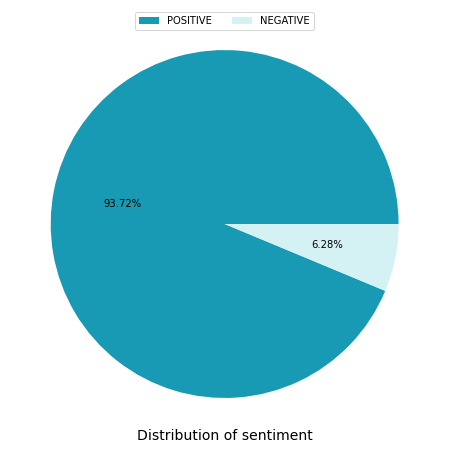

In [11]:
# distribution of sentiment
plt.figure(figsize = (8, 8))

labels = ['POSITIVE', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4']
plt.pie(data['sentiment'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

In [12]:
import spacy
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
#Creating Word Cloud
# get all used words 
all_words = pd.Series(' '.join(data['reviews.text']).split())
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(all_words))
# get words used positive reivews 
positiveWords = pd.Series(' '.join(data[data['sentiment']=='POSITIVE']['reviews.text']).split())

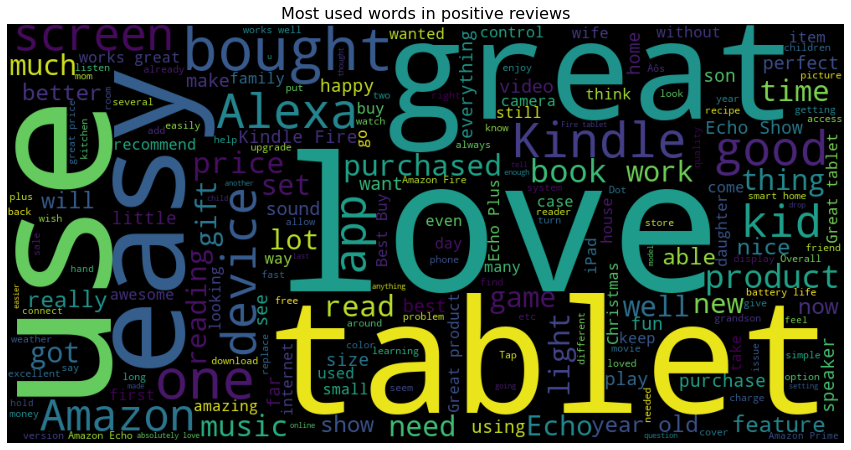

In [13]:
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(positiveWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in positive reviews", size=16)

plt.axis("off")
plt.show()

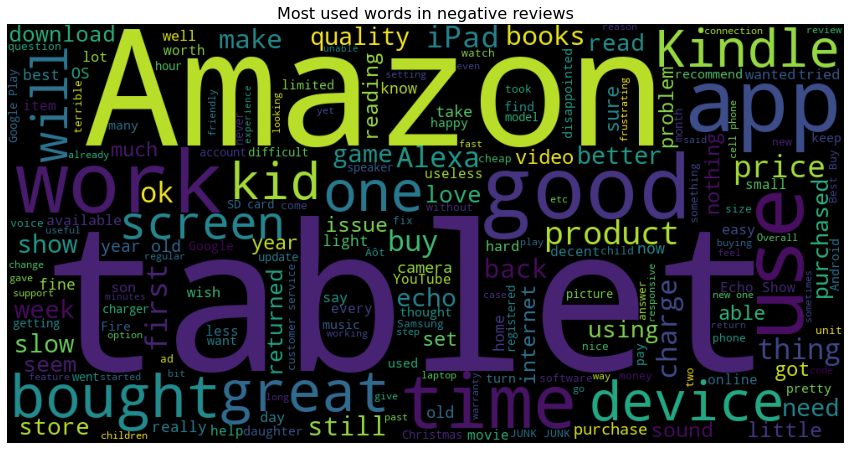

In [14]:
#Negative cloud
negativeWords = pd.Series(' '.join(data[data['sentiment']=='NEGATIVE']['reviews.text']).split())
# plot word cloud
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(negativeWords))

plt.figure(figsize=(15,8))

plt.imshow(wordcloud)
plt.title("Most used words in negative reviews", size=16)

plt.axis("off")
plt.show()


In [15]:
def clean_text(text:str):

    text = str(text)
    
    text = text.lower()
    text = text.strip()
    
    text = re.sub(' \d+', ' ', text)
    text = re.compile('<.*?>').sub('', text)
    text = re.compile('[%s]' % re.escape(string.punctuation)).sub(' ', text)
    text = re.sub('\s+', ' ', text)
    
    text = text.strip()
    
    return text

In [16]:
def remove_stopwords(text:str):

    text = str(text)
    filtered_sentence = []

    stop_words = ["a", "an", "the", "this", "that", "is", "it", "to", "and"]

    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        if w not in stop_words:
            filtered_sentence.append(w)
    text = " ".join(filtered_sentence)
    
    return text

In [17]:
def stemm_text(text:str):
    text = str(text)
    # Initialize the stemmer
    snow = SnowballStemmer('english')

    stemmed_sentence = []
    # Tokenize the sentence
    words = word_tokenize(text)
    for w in words:
        # Stem the word/token
        stemmed_sentence.append(snow.stem(w))
    text = " ".join(stemmed_sentence)
    
    return text

In [18]:
#Applying text processing functions
import string
# clean text
data['text'] = data['reviews.text'].apply(clean_text)
# remove stopwords
data['text'] = data['text'].apply(remove_stopwords)

C:\Users\Adit Choudhary\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Adit Choudhary\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [19]:
#Creating a new csv file
data.to_csv('cleaned_data.csv', index=False)
data = pd.read_csv('cleaned_data.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews.text     5000 non-null   object
 1   reviews.rating   5000 non-null   int64 
 2   sentiment_score  5000 non-null   int64 
 3   sentiment        5000 non-null   object
 4   text             5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 195.4+ KB


In [20]:
data[data['text'].isnull()]

,reviews.text,reviews.rating,sentiment_score,sentiment,text


In [21]:
data.dropna(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   reviews.text     5000 non-null   object
 1   reviews.rating   5000 non-null   int64 
 2   sentiment_score  5000 non-null   int64 
 3   sentiment        5000 non-null   object
 4   text             5000 non-null   object
dtypes: int64(2), object(3)
memory usage: 234.4+ KB


Feature Engineering and model building

In [22]:
from collections import Counter

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.utils import shuffle
from sklearn.naive_bayes import MultinomialNB

from xgboost import XGBClassifier

In [23]:
#Creating TF-IDF
#It is a statistical measure that evaluates how relevant a word is to a document in a collection of documents
vectorizer = TfidfVectorizer(max_features=700)
vectorizer.fit(data['text'])
features = vectorizer.transform(data['text'])

features.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.24322954, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [24]:
tf_idf = pd.DataFrame(features.toarray(), columns=vectorizer.get_feature_names())
# tf_idf.drop('50', axis=1, inplace=True)
tf_idf.head()

,ability,able,about,absolutely,access,account,actually,add,added,adding,...,years,yet,you,young,your,youtube,yr,äôm,äôs,äôt
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [25]:
#Splitting dataset into Train and Test Set
X_train, X_test, y_train, y_test = train_test_split(tf_idf, data['sentiment_score'], test_size=0.2, random_state=42)

print (f'Train set shape\t:{X_train.shape}\nTest set shape\t:{X_test.shape}')

Train set shape	:(4000, 700)
Test set shape	:(1000, 700)


In [26]:
yy = pd.DataFrame(y_train)
train_data = pd.concat([X_train, yy],axis=1)
train_data['sentiment_score'].value_counts()

1    3749
0     251
Name: sentiment_score, dtype: int64

In [27]:
target_count = train_data['sentiment_score'].value_counts()
negative_class = train_data[train_data['sentiment_score'] == 0]
positive_class = train_data[train_data['sentiment_score'] == 1]

negative_over = negative_class.sample(target_count[1], replace=True)

df_train_over = pd.concat([positive_class, negative_over], axis=0)
df_train_over = shuffle(df_train_over)
df_train_over.head()

,ability,able,about,absolutely,access,account,actually,add,added,adding,...,yet,you,young,your,youtube,yr,äôm,äôs,äôt,sentiment_score
1638,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
1940,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
3538,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1
2681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0
2436,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.332601,0.0,0.0,0.0,1


In [28]:
df_train_over.dropna(inplace=True)

In [29]:
X_train = df_train_over.iloc[:,:-1]
y_train = df_train_over['sentiment_score']

In [30]:
def modeling(Model, Xtrain = X_train, Xtest = X_test):
    
    # Instantiate the classifier: model
    model = Model
    
    # Fitting classifier to the Training set (all features)
    model.fit(Xtrain, y_train)
    
    global y_pred
    # Predicting the Test set results
    y_pred = model.predict(Xtest)
    
    # Assign f1 score to a variable
    print(classification_report(y_test, y_pred))
    print ('AUC ',roc_auc_score(y_test, y_pred))
    #cm = confusion_matrix(y_test, y_pred)
    confusion_matrix = pd.crosstab(index=y_test, columns=np.round(y_pred), rownames=['Actual'], colnames=['Predictions']).astype(int)
    plt.figure(figsize = (8,8))

    sns.heatmap(confusion_matrix, annot=True,annot_kws={"fontsize":12}, fmt='.2f', cmap='Blues').set_title('Confusion Matrix') 

              precision    recall  f1-score   support

           0       0.27      0.81      0.40        63
           1       0.99      0.85      0.91       937

    accuracy                           0.85      1000
   macro avg       0.63      0.83      0.66      1000
weighted avg       0.94      0.85      0.88      1000

AUC  0.8305890125527265


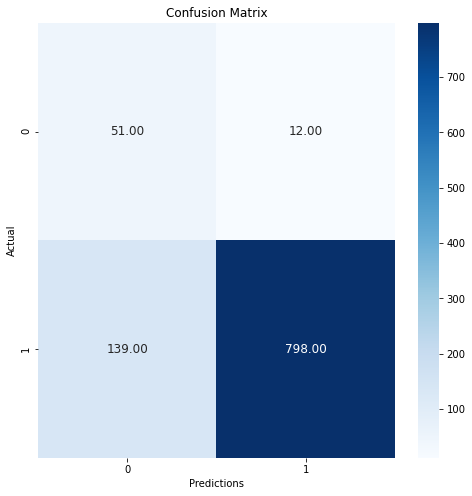

In [31]:
#Naive Bayes
modeling(MultinomialNB())

              precision    recall  f1-score   support

           0       0.50      0.46      0.48        63
           1       0.96      0.97      0.97       937

    accuracy                           0.94      1000
   macro avg       0.73      0.71      0.72      1000
weighted avg       0.93      0.94      0.94      1000

AUC  0.7146838102014197


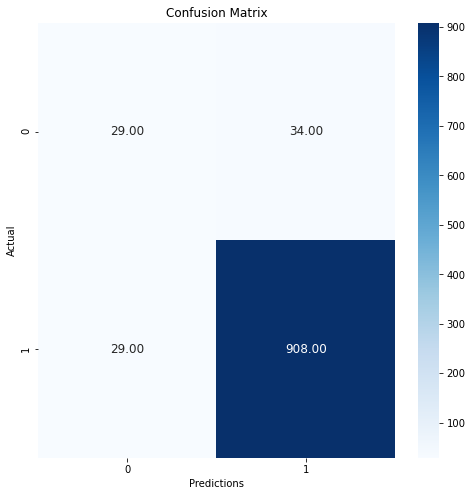

In [32]:
#XGBoost
modeling(XGBClassifier());

In [33]:
from keras.layers import Dense, LSTM,Embedding, SpatialDropout1D
from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

In [35]:
max_features=5000
tokenizer = Tokenizer(num_words=max_features, split=' ')
tokenizer.fit_on_texts(data['reviews.text'].values)
X = tokenizer.texts_to_sequences(data['reviews.text'].values)
X = pad_sequences(X,maxlen=600)

In [36]:
embed_dim = 128
lstm_out = 128

model = Sequential()
model.add(Embedding(max_features, embed_dim,input_length = X.shape[1]))
model.add(SpatialDropout1D(0.4))
model.add(LSTM(lstm_out, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam',metrics = ['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 600, 128)          640000    
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 600, 128)          0         
_________________________________________________________________
lstm (LSTM)                  (None, 128)               131584    
_________________________________________________________________
dense (Dense)                (None, 2)                 258       
Total params: 771,842
Trainable params: 771,842
Non-trainable params: 0
_________________________________________________________________
None


In [37]:
from sklearn.model_selection import train_test_split as tts
Y=pd.get_dummies(data['sentiment']).values
X_train, X_test, y_train, y_test = tts(X,Y, test_size = 0.2, random_state = 42)

In [39]:
batch_size = 64
model.fit(X_train, y_train, epochs = 16, batch_size=batch_size,validation_data=(X_test,y_test),verbose = True)

Epoch 1/16
63/63 [==============================] - 316s 5s/step - loss: 0.2798 - accuracy: 0.9273 - val_loss: 0.2227 - val_accuracy: 0.9370
Epoch 2/16
63/63 [==============================] - 339s 5s/step - loss: 0.1899 - accuracy: 0.9375 - val_loss: 0.1831 - val_accuracy: 0.9390
Epoch 3/16
63/63 [==============================] - 357s 6s/step - loss: 0.1247 - accuracy: 0.9538 - val_loss: 0.1749 - val_accuracy: 0.9400
Epoch 4/16
63/63 [==============================] - 300s 5s/step - loss: 0.0863 - accuracy: 0.9710 - val_loss: 0.2073 - val_accuracy: 0.9440
Epoch 5/16
63/63 [==============================] - 300s 5s/step - loss: 0.2556 - accuracy: 0.9442 - val_loss: 0.2141 - val_accuracy: 0.9370
Epoch 6/16
63/63 [==============================] - 299s 5s/step - loss: 0.1136 - accuracy: 0.9605 - val_loss: 0.1902 - val_accuracy: 0.9410
Epoch 7/16
63/63 [==============================] - 301s 5s/step - loss: 0.0693 - accuracy: 0.9750 - val_loss: 0.2456 - val_accuracy: 0.9430
Epoch 8/16
63